In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/alekyavadakattu/Desktop/shootings.csv')
df.head()

,Unnamed: 0,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,0,228798151,5/27/21,21:30:00,QUEENS,UNKNOWN,105,0,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,18-24,M,BLACK,1058925.000,180924.0000,40.662964620000025,-73.73083869,POINT (-73.73083868899994 40.662964620000025)
1,1,137471050,6/27/14,17:40:00,BRONX,UNKNOWN,40,0,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,18-24,M,BLACK,1005028.000,234516.0000,40.81035186300005,-73.92494233,POINT (-73.92494232599995 40.81035186300006)
2,2,147998800,11/21/15,3:56:00,QUEENS,UNKNOWN,108,0,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,25-44,M,WHITE,1007667.938,209836.5313,40.74260663300004,-73.91549174,POINT (-73.91549174199997 40.74260663300004)
3,3,146837977,10/9/15,18:30:00,BRONX,UNKNOWN,44,0,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,<18,M,WHITE HISPANIC,1006537.375,244511.1406,40.83778200300002,-73.91945661,POINT (-73.91945661499994 40.83778200300003)
4,4,58921844,2/19/09,22:58:00,BRONX,UNKNOWN,47,0,UNKNOWN,UNKNOWN,...,M,BLACK,45-64,M,BLACK,1024921.813,262189.4063,40.88623791800006,-73.85290951,POINT (-73.85290950899997 40.88623791800006)


**a) What is the demographic composition, in terms of racial and age groups, of victims who have been subject 
to homicide incidents within the dataset?**

In [4]:
# Filter out rows where 'VIC_RACE' or 'VIC_AGE_GROUP' is 'UNKNOWN'
homicide_df = df[df['STATISTICAL_MURDER_FLAG'].astype(str).str.upper() == 'TRUE']
unknown_race = homicide_df['VIC_RACE'] == 'UNKNOWN'
unknown_age = homicide_df['VIC_AGE_GROUP'] == 'UNKNOWN'

filtered_homicide_df = homicide_df[~(unknown_race | unknown_age)]

# Calculating race percentages
race_counts = filtered_homicide_df['VIC_RACE'].value_counts()
total_race_counts = race_counts.sum()
race_percentages = ((race_counts / total_race_counts) * 100).round(2)

# Calculating age group percentages
age_counts = filtered_homicide_df['VIC_AGE_GROUP'].value_counts()
total_age_counts = age_counts.sum()
age_percentages = ((age_counts / total_age_counts) * 100).round(2)

race_percentages, age_percentages


(VIC_RACE
 BLACK                       70.12
 WHITE HISPANIC              16.21
 BLACK HISPANIC               8.24
 WHITE                        3.53
 ASIAN / PACIFIC ISLANDER     1.91
 Name: count, dtype: float64,
 VIC_AGE_GROUP
 25-44    51.02
 18-24    32.01
 45-64     8.87
 <18       7.04
 65+       1.07
 Name: count, dtype: float64)

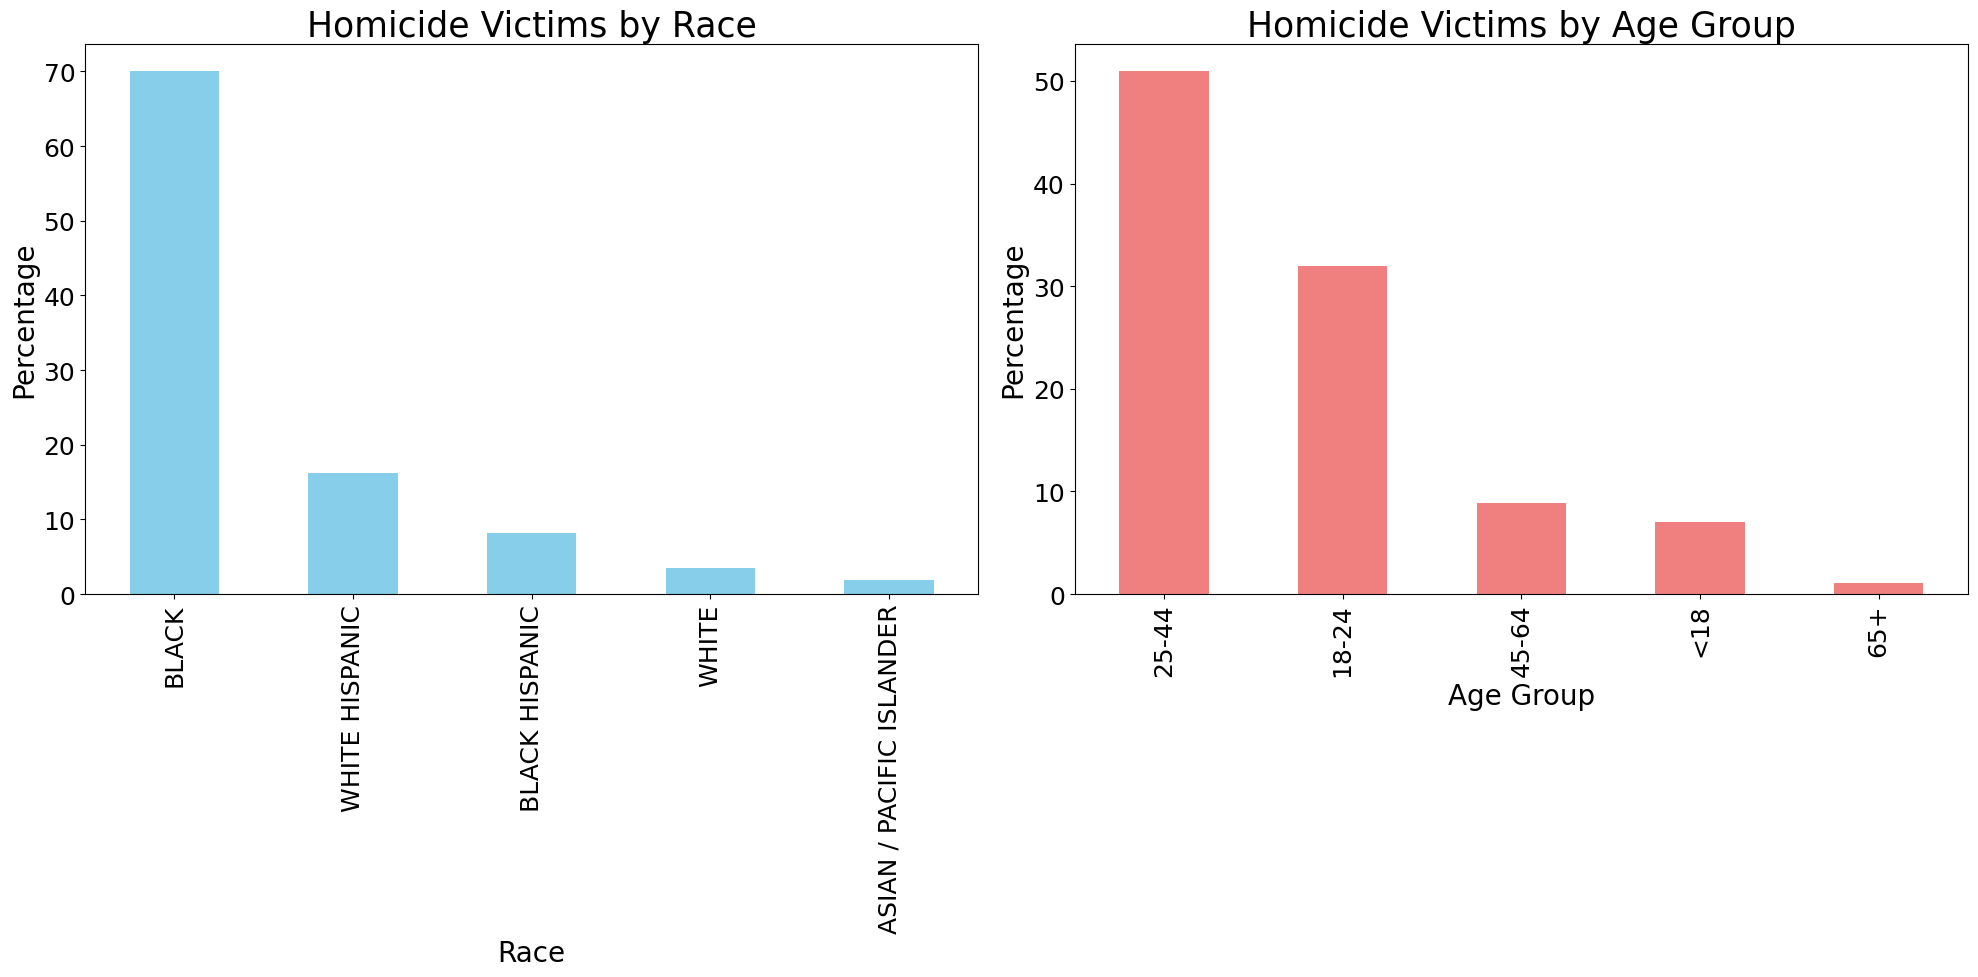

In [5]:
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot race percentages 
race_percentages.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Homicide Victims by Race', fontsize=25)
ax1.set_ylabel('Percentage', fontsize=20)
ax1.set_xlabel('Race', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=18)

# Plot age group percentages 
age_percentages.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Homicide Victims by Age Group', fontsize=25)
ax2.set_ylabel('Percentage', fontsize=20)
ax2.set_xlabel('Age Group', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=18)

# Show plot
plt.tight_layout()
plt.show()



**b) Within the dataset, what is the distribution of perpetrators' age groups, particularly among those who have committed homicides?**

In [6]:
# Extracting perpetrator age group for homicide incidents
homicide_perps_df = df[df["STATISTICAL_MURDER_FLAG"] & (df["PERP_AGE_GROUP"] != "UNKNOWN")]

# Analyze the distribution of perpetrator age groups in homicide incidents
perp_age_distribution_homicide = homicide_perps_df['PERP_AGE_GROUP'].value_counts()
perp_age_percentage_homicide = ((perp_age_distribution_homicide / homicide_perps_df['PERP_AGE_GROUP'].count()) * 100).round(2)

perp_age_percentage_homicide



PERP_AGE_GROUP
25-44    45.41
18-24    38.80
<18       8.55
45-64     6.50
65+       0.74
Name: count, dtype: float64

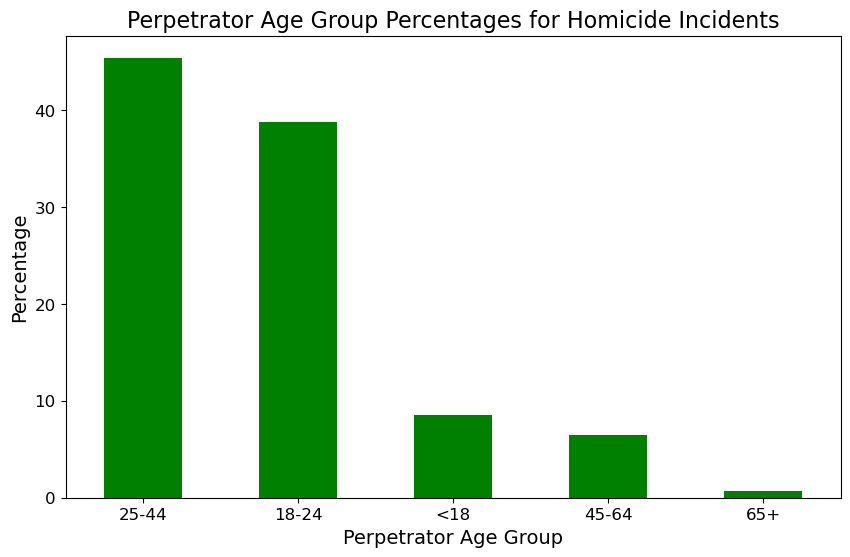

In [7]:
# Visualize the perpetrator age group percentages for homicide incidents
plt.figure(figsize=(10, 6))
perp_age_percentage_homicide.plot(kind='bar', color='green')
plt.title('Perpetrator Age Group Percentages for Homicide Incidents', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Perpetrator Age Group', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


**c) Can we discern variations in the temporal distribution of criminal activities across different locations, with a focus on identifying peak times and patterns of occurrence?**

In [12]:
boro_yearly_crime_distribution = pd.read_csv('/Users/alekyavadakattu/Desktop/shootings.csv')

# Convert 'OCCUR_DATE' to datetime format to extract the year
boro_yearly_crime_distribution['OCCUR_DATE'] = pd.to_datetime(boro_yearly_crime_distribution['OCCUR_DATE'])
boro_yearly_crime_distribution['YEAR'] = boro_yearly_crime_distribution['OCCUR_DATE'].dt.year

# Group by 'BORO' and 'YEAR', then count the incidents per year per borough
grouped_data = boro_yearly_crime_distribution.groupby(['BORO', 'YEAR']).size().reset_index(name='Total Count')

# Find the year with the maximum incidents for each borough
max_incidents_per_boro = grouped_data.groupby('BORO').apply(lambda x: x.nlargest(1, 'Total Count')).reset_index(drop=True)

# Sort the maximum incidents per borough in descending order
sorted_max_incidents_per_boro = max_incidents_per_boro.sort_values('Total Count', ascending=False)

# Display the sorted DataFrame
print(sorted_max_incidents_per_boro)

/var/folders/bn/g9p3r8qd4339301l_fgm27h80000gn/T/ipykernel_22281/2832988456.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  boro_yearly_crime_distribution['OCCUR_DATE'] = pd.to_datetime(boro_yearly_crime_distribution['OCCUR_DATE'])


            BORO  YEAR  Total Count
1       BROOKLYN  2006          850
0          BRONX  2021          701
2      MANHATTAN  2021          343
3         QUEENS  2008          326
4  STATEN ISLAND  2008           69


/var/folders/bn/g9p3r8qd4339301l_fgm27h80000gn/T/ipykernel_22281/2033807045.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OCCUR_DAY'] = pd.to_datetime(df['OCCUR_DATE']).dt.dayofweek


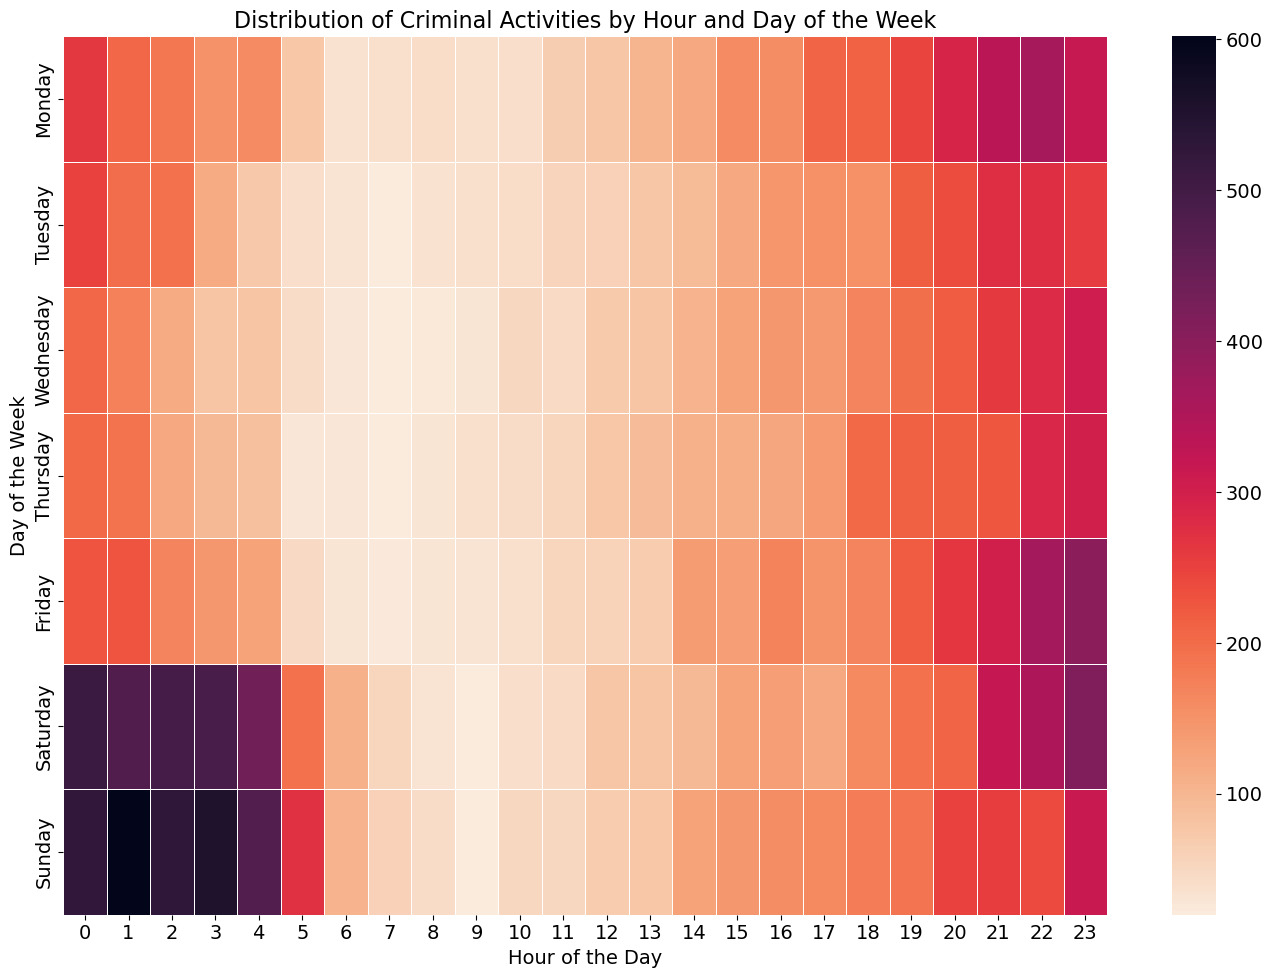

In [16]:
df['OCCUR_DAY'] = pd.to_datetime(df['OCCUR_DATE']).dt.dayofweek
df['OCCUR_HOUR'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S').dt.hour

# Create a pivot table to count incidents by hour and day of the week
pivot_table_day_hour = df.pivot_table(values='INCIDENT_KEY', 
                                      index='OCCUR_DAY', 
                                      columns='OCCUR_HOUR', 
                                      aggfunc='count', 
                                      fill_value=0)

# Visualize as a heatmap with hour of the day on x-axis and day of the week on y-axis
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table_day_hour, cmap='rocket_r', linewidths=.5, annot=False)
plt.title('Distribution of Criminal Activities by Hour and Day of the Week', fontsize=16)
plt.ylabel('Day of the Week', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(np.arange(0.5, len(pivot_table_day_hour.index), 1), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()
